## The problem statement is to predict the salaries of data professionals based on various features like experience, job role, and performance.

# important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Data collection

In [ ]:
df = pd.read_csv('/content/Salary Prediction of Data Professions.csv')

# 2. Data Inspection and Cleaning

In [ ]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
df.shape

(2639, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [ ]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [ ]:
df.duplicated().sum()

161

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

 ### Convert Data Types

In [ ]:
df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'], errors='coerce')
df['SEX'] = df['SEX'].astype('category')
df['DESIGNATION'] = df['DESIGNATION'].astype('category')
df['UNIT'] = df['UNIT'].astype('category')

###  filing the missing values

In [ ]:
df['LAST NAME'].fillna(method='ffill', inplace=True)
df['DOJ'].fillna(method='bfill', inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LEAVES USED'].fillna(df['LEAVES USED'].median(), inplace=True)
df['LEAVES REMAINING'].fillna(df['LEAVES REMAINING'].median(), inplace=True)
df['RATINGS'].fillna(df['RATINGS'].median(), inplace=True)

In [ ]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [ ]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,ARMEN,F,2014-07-28,2016-01-07,Associate,24.0,89207,Web,22.0,13.0,3.0,7
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,2014-11-20,2016-01-07,Analyst,24.0,43161,Operations,27.0,3.0,3.0,3


# 3. Exploratory Data Analysis (EDA)

In [ ]:
df.describe(include='all')

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2478,2478,2478,2478,2478,2478,2478.000000,2478.000000,2478,2478.000000,2478.000000,2478.000000,2478.000000
unique,2367,2475,2,NaN,NaN,6,NaN,NaN,6,NaN,NaN,NaN,NaN
top,ROBBIE,ARMEN,F,NaN,NaN,Analyst,NaN,NaN,IT,NaN,NaN,NaN,NaN
freq,2,2,1259,NaN,NaN,1854,NaN,NaN,437,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2013-10-29 10:06:40.968523008,2016-01-07 00:00:00,NaN,24.726392,58076.235270,NaN,22.493140,7.511703,3.481437,1.560129
min,NaN,NaN,NaN,2009-01-23 00:00:00,2016-01-07 00:00:00,NaN,21.000000,40001.000000,NaN,15.000000,0.000000,2.000000,0.000000
25%,NaN,NaN,NaN,2013-05-05 06:00:00,2016-01-07 00:00:00,NaN,22.000000,43401.250000,NaN,19.000000,4.000000,2.000000,0.000000
50%,NaN,NaN,NaN,2013-12-07 00:00:00,2016-01-07 00:00:00,NaN,24.000000,46733.500000,NaN,22.000000,8.000000,3.000000,1.000000
75%,NaN,NaN,NaN,2014-07-11 00:00:00,2016-01-07 00:00:00,NaN,25.000000,50323.750000,NaN,26.000000,11.000000,4.000000,2.000000
max,NaN,NaN,NaN,2015-01-31 00:00:00,2016-01-07 00:00:00,NaN,45.000000,388112.000000,NaN,30.000000,15.000000,5.000000,23.000000


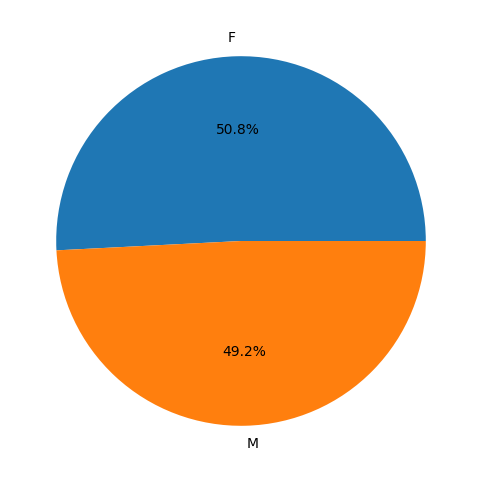

In [ ]:
df['SEX'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(df['SEX'].value_counts(), labels=df['SEX'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [ ]:
dfg = df.groupby('SEX')['SALARY'].mean()
dfg

SEX
F    58991.014297
M    57131.438884
Name: SALARY, dtype: float64

In [ ]:
df['DESIGNATION'].value_counts()

DESIGNATION
Analyst           1854
Senior Analyst     301
Associate          156
Manager             79
Senior Manager      61
Director            27
Name: count, dtype: int64

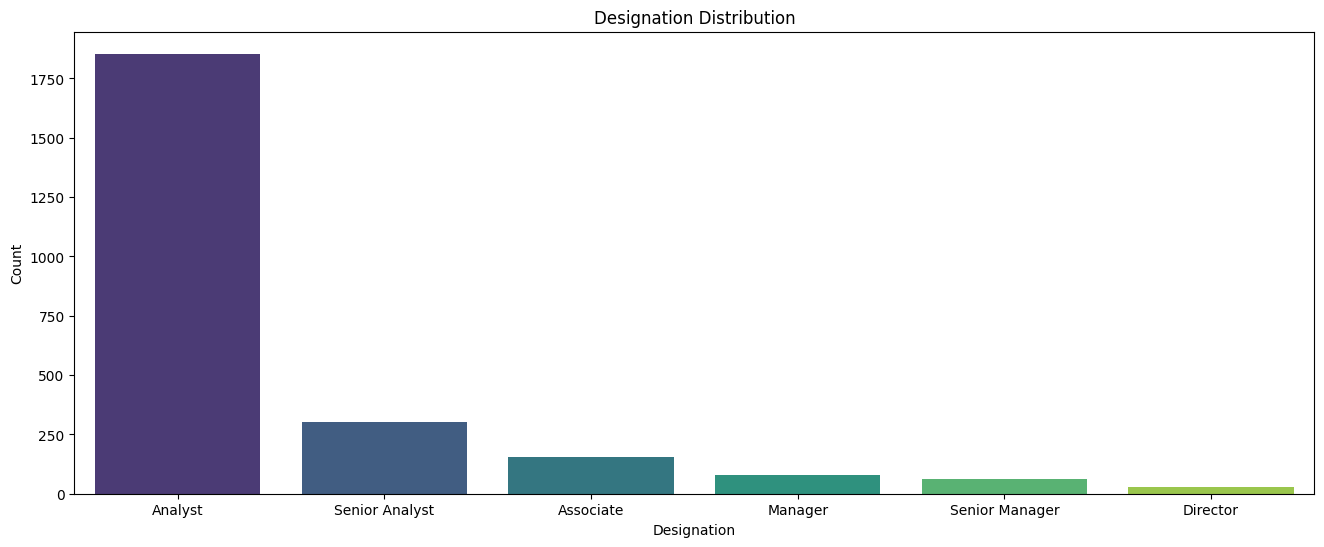

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16, 6))
sns.countplot(x='DESIGNATION', data=df, order=df['DESIGNATION'].value_counts().index, palette='viridis')
plt.title('Designation Distribution')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.show()

In [ ]:
dfg = df.groupby('DESIGNATION')['SALARY'].mean()
dfg

DESIGNATION
Analyst            45026.021575
Associate          87088.544872
Director          294784.555556
Manager           126012.620253
Senior Analyst     59956.558140
Senior Manager    178487.704918
Name: SALARY, dtype: float64

In [ ]:
df['UNIT'].value_counts()

UNIT
IT            437
Finance       417
Operations    416
Marketing     411
Web           400
Management    397
Name: count, dtype: int64

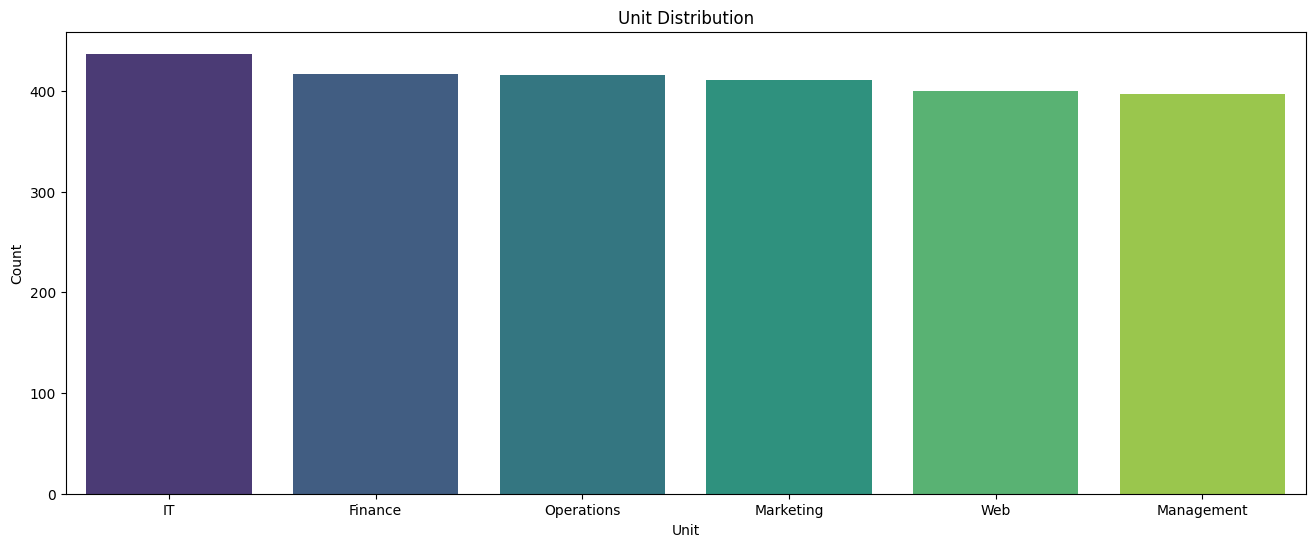

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(x='UNIT', data=df, order=df['UNIT'].value_counts().index, palette='viridis')
plt.title('Unit Distribution')
plt.xlabel('Unit')
plt.ylabel('Count')
plt.show()

In [ ]:
dfg = df.groupby('UNIT')['SALARY'].mean()
dfg

UNIT
Finance       58376.647482
IT            59149.832952
Management    59063.949622
Marketing     59140.591241
Operations    55520.218750
Web           57174.475000
Name: SALARY, dtype: float64

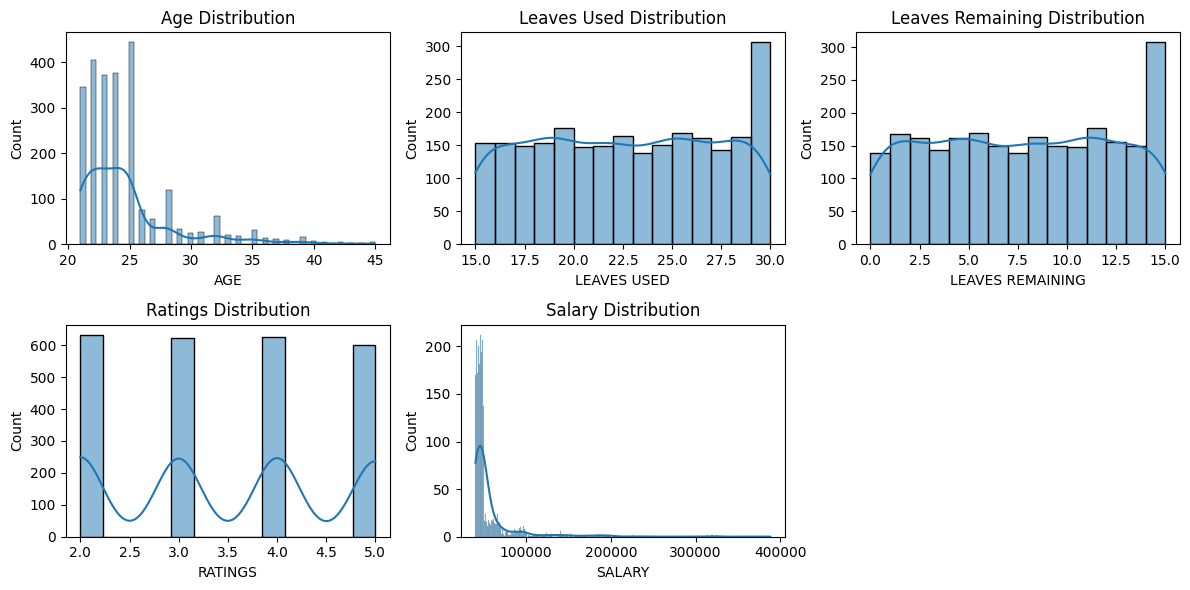

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(df['AGE'].dropna(), kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['LEAVES USED'].dropna(), kde=True)
plt.title('Leaves Used Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['LEAVES REMAINING'].dropna(), kde=True)
plt.title('Leaves Remaining Distribution')

plt.subplot(2, 3, 4)
sns.histplot(df['RATINGS'].dropna(), kde=True)
plt.title('Ratings Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['SALARY'], kde=True)
plt.title('Salary Distribution')

plt.tight_layout()
plt.show()

### outliers

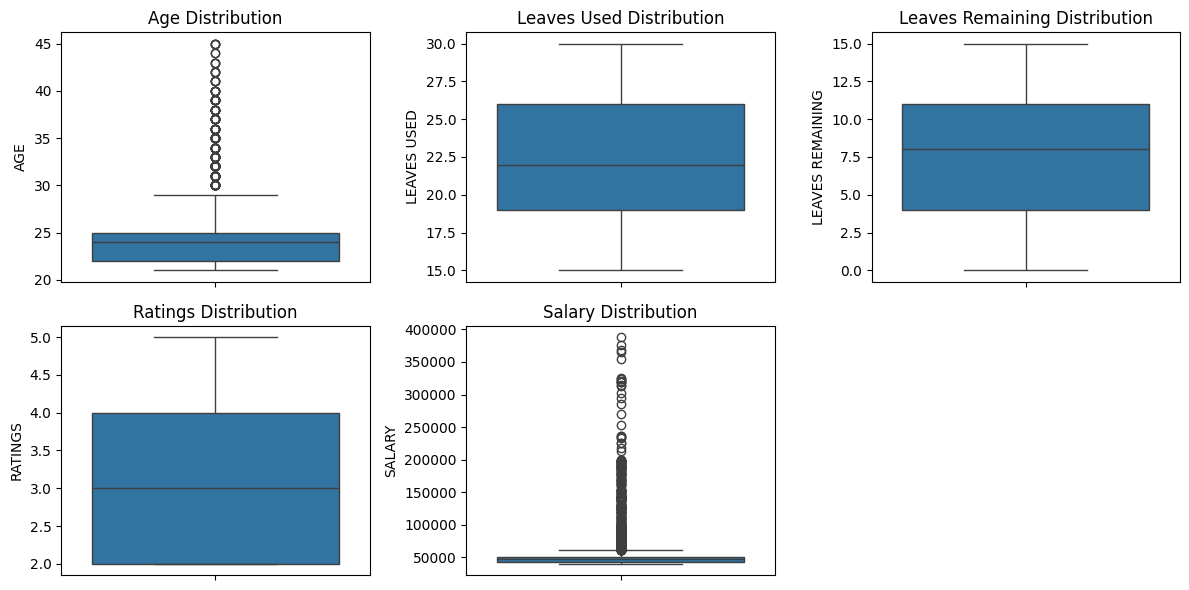

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
# Removed kde argument as it's not applicable to boxplots
sns.boxplot(df['AGE'].dropna())
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.boxplot(df['LEAVES USED'].dropna())
plt.title('Leaves Used Distribution')

plt.subplot(2, 3, 3)
sns.boxplot(df['LEAVES REMAINING'].dropna())
plt.title('Leaves Remaining Distribution')

plt.subplot(2, 3, 4)
sns.boxplot(df['RATINGS'].dropna())
plt.title('Ratings Distribution')

plt.subplot(2, 3, 5)
sns.boxplot(df['SALARY'])
plt.title('Salary Distribution')

plt.tight_layout()
plt.show()

# remove Outliers

In [ ]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where(series < lower_bound, lower_bound, np.where(series > upper_bound, upper_bound, series))

# Cap outliers for specified columns
columns_to_cap = ['SALARY','AGE']
for column in columns_to_cap:
    df[column] = cap_outliers(df[column])

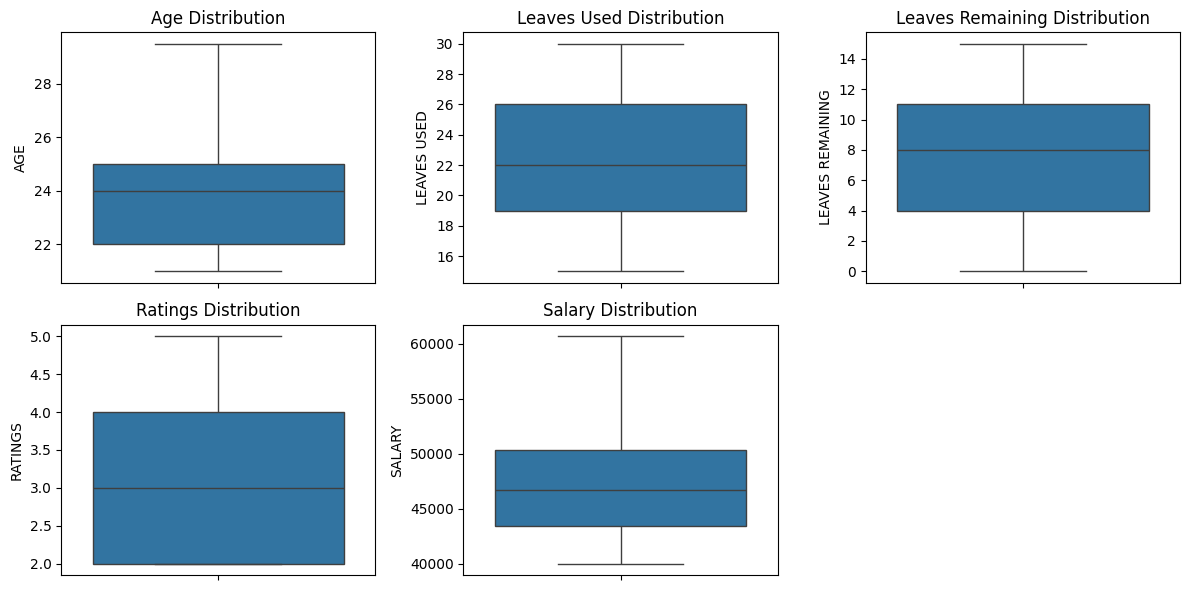

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
# Removed kde argument as it's not applicable to boxplots
sns.boxplot(df['AGE'].dropna())
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.boxplot(df['LEAVES USED'].dropna())
plt.title('Leaves Used Distribution')

plt.subplot(2, 3, 3)
sns.boxplot(df['LEAVES REMAINING'].dropna())
plt.title('Leaves Remaining Distribution')

plt.subplot(2, 3, 4)
sns.boxplot(df['RATINGS'].dropna())
plt.title('Ratings Distribution')

plt.subplot(2, 3, 5)
sns.boxplot(df['SALARY'])
plt.title('Salary Distribution')

plt.tight_layout()
plt.show()

# 4. Feature Engineering

In [ ]:
df['TOTAL LEAVES'] = df['LEAVES USED'] + df['LEAVES REMAINING']

In [ ]:
df['EXPERIENCE'] = (df['CURRENT DATE'] - df['DOJ']).dt.days // 365

In [ ]:
df.head(2)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TOTAL LEAVES,EXPERIENCE
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570.0,Finance,24.0,6.0,2.0,0,30.0,1
1,ANNIE,ARMEN,F,2014-07-28,2016-01-07,Associate,24.0,60707.5,Web,22.0,13.0,3.0,7,35.0,1


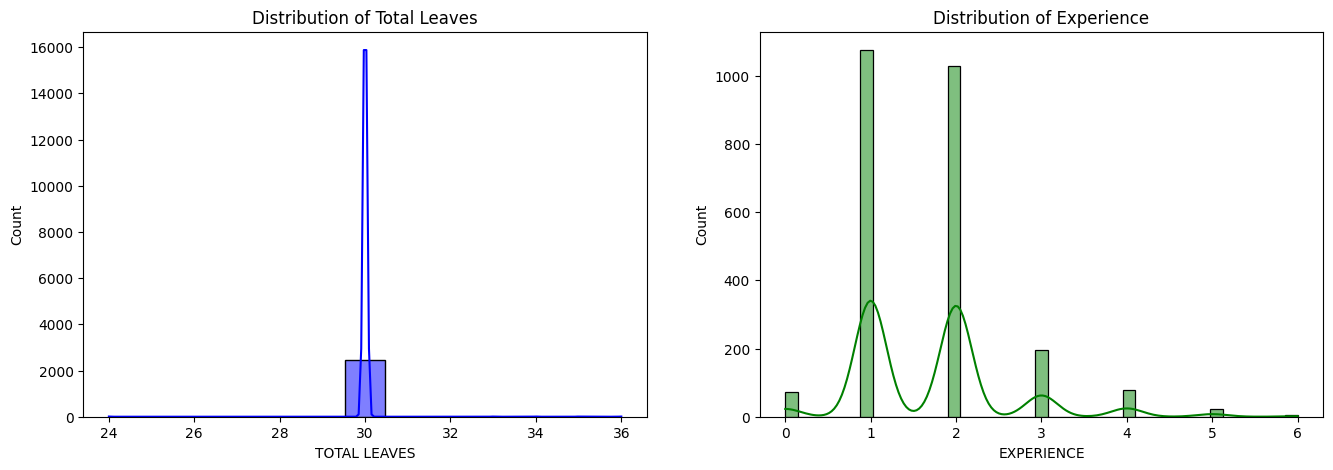

In [ ]:
# Distribution plot for TOTAL LEAV
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['TOTAL LEAVES'], kde=True, color='blue')
plt.title('Distribution of Total Leaves')

# Distribution plot for EXPERIENCE
plt.subplot(1, 2, 2)
sns.histplot(df['EXPERIENCE'], kde=True, color='green')
plt.title('Distribution of Experience')
plt.show()

In [ ]:
correlation_matrix = df[['TOTAL LEAVES', 'EXPERIENCE', 'SALARY']].corr()
print(correlation_matrix)

              TOTAL LEAVES  EXPERIENCE    SALARY
TOTAL LEAVES      1.000000    0.028426  0.020128
EXPERIENCE        0.028426    1.000000  0.442887
SALARY            0.020128    0.442887  1.000000


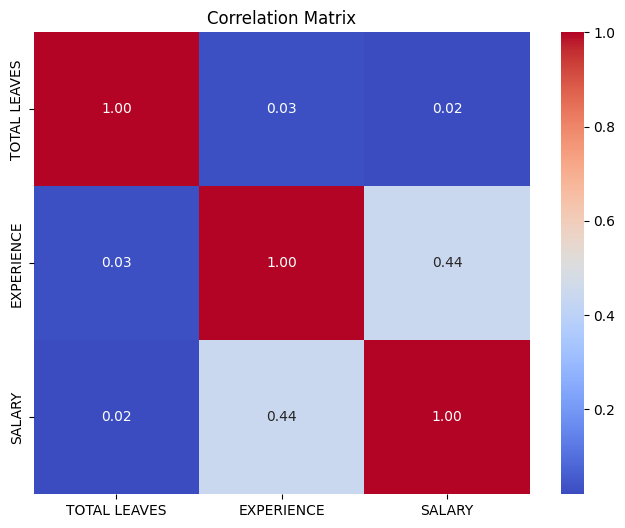

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.head(2)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TOTAL LEAVES,EXPERIENCE
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570.0,Finance,24.0,6.0,2.0,0,30.0,1
1,ANNIE,ARMEN,F,2014-07-28,2016-01-07,Associate,24.0,60707.5,Web,22.0,13.0,3.0,7,35.0,1


In [ ]:
df = df.drop(columns=['LEAVES USED', 'LEAVES REMAINING', 'DOJ', 'CURRENT DATE'])

In [ ]:
df.head(2)

,FIRST NAME,LAST NAME,SEX,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP,TOTAL LEAVES,EXPERIENCE
0,TOMASA,ARMEN,F,Analyst,21.0,44570.0,Finance,2.0,0,30.0,1
1,ANNIE,ARMEN,F,Associate,24.0,60707.5,Web,3.0,7,35.0,1


# 5. Creating Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Prepare Data for Modeling

In [ ]:
categorical_features = ['SEX', 'DESIGNATION', 'UNIT']
numeric_features = ['AGE', 'RATINGS', 'PAST EXP', 'TOTAL LEAVES', 'EXPERIENCE']

X = df.drop('SALARY', axis=1)
y = df['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create Pipelines for Multiple Models

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['AGE', 'RATINGS', 'PAST EXP', 'TOTAL LEAVES',
                                  'EXPERIENCE']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['SEX', 'DESIGNATION', 'UNIT'])])

In [ ]:
# Define the pipelines
pipelines = {
    'Linear Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    'Decision Tree': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    'Random Forest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'Gradient Boosting': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(random_state=42))
    ]),
    'SVR': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', SVR())
    ]),
    'XGBoost': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(random_state=42))
    ])
}

### Evaluation model

In [ ]:
# Evaluate each model
results = {}
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R^2': r2}

# Print the results
for model_name, metrics in results.items():
    print(f"{model_name} - MAE: {metrics['MAE']}, MSE: {metrics['MSE']}, R^2: {metrics['R^2']}")

Linear Regression - MAE: 2330.5875225769655, MSE: 8216047.127319162, R^2: 0.8314757580314052
Decision Tree - MAE: 2727.993754800307, MSE: 13498296.06087705, R^2: 0.7231284002786358
Random Forest - MAE: 2531.766590639536, MSE: 10540254.673026312, R^2: 0.7838025511049753
Gradient Boosting - MAE: 2350.764210874021, MSE: 8410040.49263974, R^2: 0.8274966444344443
SVR - MAE: 5386.135914852255, MSE: 51006566.37711205, R^2: -0.04622609886713103
XGBoost - MAE: 2563.1857516381046, MSE: 10677913.116747579, R^2: 0.7809789566782144


### Hyperparameter Tuning

In [ ]:
# Define the parameter grid for each model
param_grids = {
    'Linear Regression': {
        'model__fit_intercept': [True, False]
    },
    'Decision Tree': {
        'model__max_depth': [5, 10, 15, None],
        'model__min_samples_split': [2, 10, 20]
    },
    'Random Forest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [5, 10, 15, None],
        'model__min_samples_split': [2, 10, 20]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.05],
        'model__max_depth': [3, 5, 7]
    },
    'SVR': {
        'model__C': [0.1, 1, 10],
        'model__epsilon': [0.01, 0.1, 0.2],
        'model__kernel': ['linear', 'poly', 'rbf']
    },
    'XGBoost': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.05],
        'model__max_depth': [3, 5, 7]
    }
}

In [ ]:
best_models = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} Best Params: {grid_search.best_params_}")

Linear Regression Best Params: {'model__fit_intercept': True}
Decision Tree Best Params: {'model__max_depth': 5, 'model__min_samples_split': 20}
Random Forest Best Params: {'model__max_depth': 5, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Gradient Boosting Best Params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
SVR Best Params: {'model__C': 10, 'model__epsilon': 0.2, 'model__kernel': 'linear'}
XGBoost Best Params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}


In [ ]:
# Evaluate the tuned models
tuned_results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    tuned_results[model_name] = {'MAE': mae, 'MSE': mse, 'R^2': r2}

In [ ]:
for model_name, metrics in tuned_results.items():
    print(f"{model_name} - MAE: {metrics['MAE']}, MSE: {metrics['MSE']}, R^2: {metrics['R^2']}")


Linear Regression - MAE: 2330.5875225769655, MSE: 8216047.127319162, R^2: 0.8314757580314052
Decision Tree - MAE: 2314.3054221126145, MSE: 8401563.662765643, R^2: 0.8276705177468403
Random Forest - MAE: 2312.2913113925924, MSE: 8258674.385095295, R^2: 0.8306014049279479
Gradient Boosting - MAE: 2343.492062354923, MSE: 8362709.723221706, R^2: 0.8284674740699562
SVR - MAE: 3144.7309812089134, MSE: 14877534.722720956, R^2: 0.6948380136268658
XGBoost - MAE: 2343.234926285282, MSE: 8362059.5587196965, R^2: 0.8284808099817589


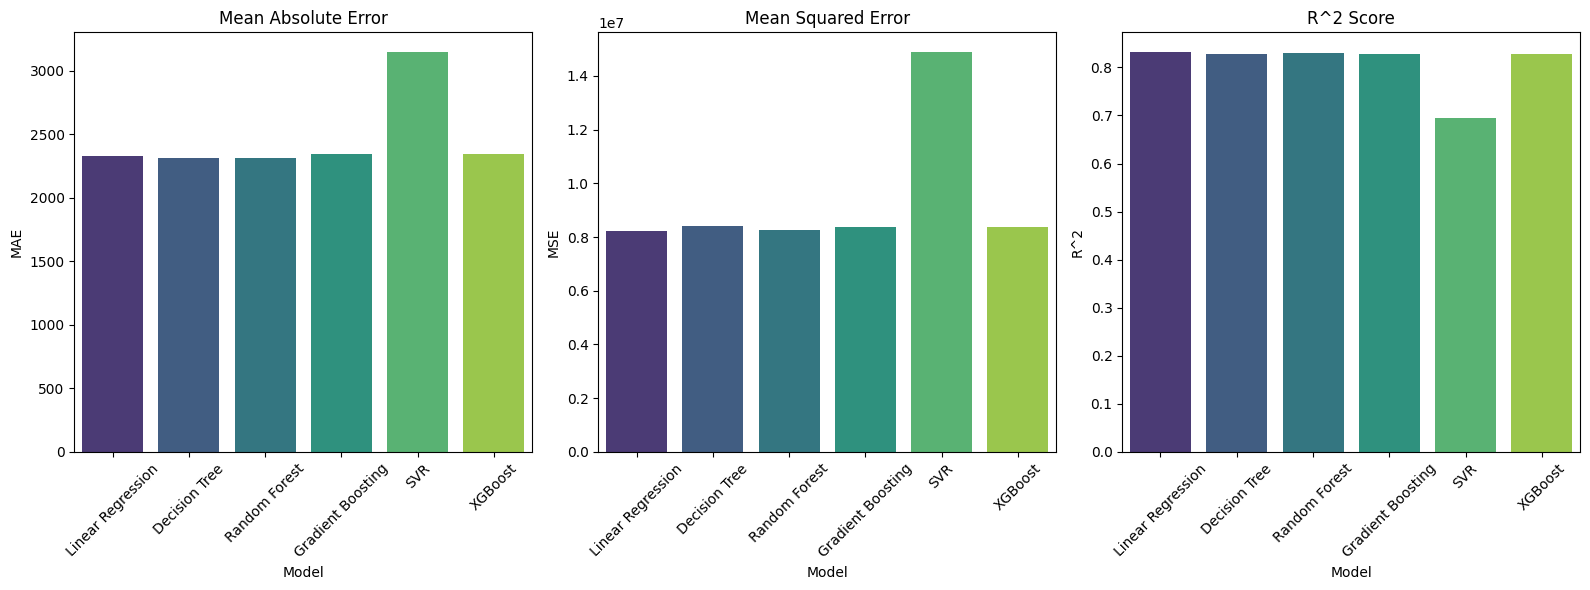

In [ ]:
# Visualize the results
results_df = pd.DataFrame(tuned_results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')
plt.title('Mean Absolute Error')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis')
plt.title('Mean Squared Error')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R^2', data=results_df, palette='viridis')
plt.title('R^2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
df.head(5)

,FIRST NAME,LAST NAME,SEX,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP,TOTAL LEAVES,EXPERIENCE
0,TOMASA,ARMEN,F,Analyst,21.0,44570.0,Finance,2.0,0,30.0,1
1,ANNIE,ARMEN,F,Associate,24.0,60707.5,Web,3.0,7,35.0,1
2,OLIVE,ANCY,F,Analyst,21.0,40955.0,Finance,3.0,0,30.0,1
3,CHERRY,AQUILAR,F,Analyst,22.0,45550.0,IT,3.0,0,30.0,2
4,LEON,ABOULAHOUD,M,Analyst,24.0,43161.0,Operations,3.0,3,30.0,1


In [ ]:
import joblib
# Save the best performing model (e.g., Random Forest)
best_model = best_models['Random Forest']
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [ ]:
# Load the saved model
model = joblib.load('best_model.pkl')

# Example input data for prediction
example_input_data = pd.DataFrame([{
    'SEX': 'M',
    'DESIGNATION': 'Analyst',
    'AGE': 25,
    'UNIT': 'Finance',
    'LEAVES USED': 5,
    'LEAVES REMAINING': 25,
    'RATINGS': 4,
    'PAST EXP': 3,
    'TOTAL LEAVES': 30,
    'EXPERIENCE': 3
}])

In [ ]:
# Preprocess the input data in the same way as the training data
predicted_salary = model.predict(example_input_data)

predicted_salary

array([44957.74319876])